In [6]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

# import different organs

In [7]:
contour_path="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/rtstruct/rtss.dcm"
img_path="C:/Users/lykha/OneDrive/Documents/Medical-imaging-Research/Data/Prostate Cases/9/ct"
slices = [pydicom.read_file(img_path + '/' + s) for s in os.listdir(img_path)]
image = np.stack([s.pixel_array for s in slices], axis=-1)
contour=pydicom.read_file(contour_path)

In [8]:
#bladder
contours1=af.read_structure(contour, organ_id = 1)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label1, colors1 = af.get_mask(contours1, slices, image)

In [9]:
#rectum
contours2=af.read_structure(contour, organ_id = 2)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label2, colors2 = af.get_mask(contours2, slices, image)

In [10]:
#prostate
contours3=af.read_structure(contour, organ_id = 3)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label3, colors3 = af.get_mask(contours3, slices, image)

In [11]:
#Seminal vesicles
contours4=af.read_structure(contour, organ_id = 4)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label4, colors4 = af.get_mask(contours4, slices, image)

In [12]:
#femoral head
contours5=af.read_structure(contour, organ_id = 6)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label5, colors5 = af.get_mask(contours5, slices, image)

# Bladder

(-0.5, 511.5, 511.5, -0.5)

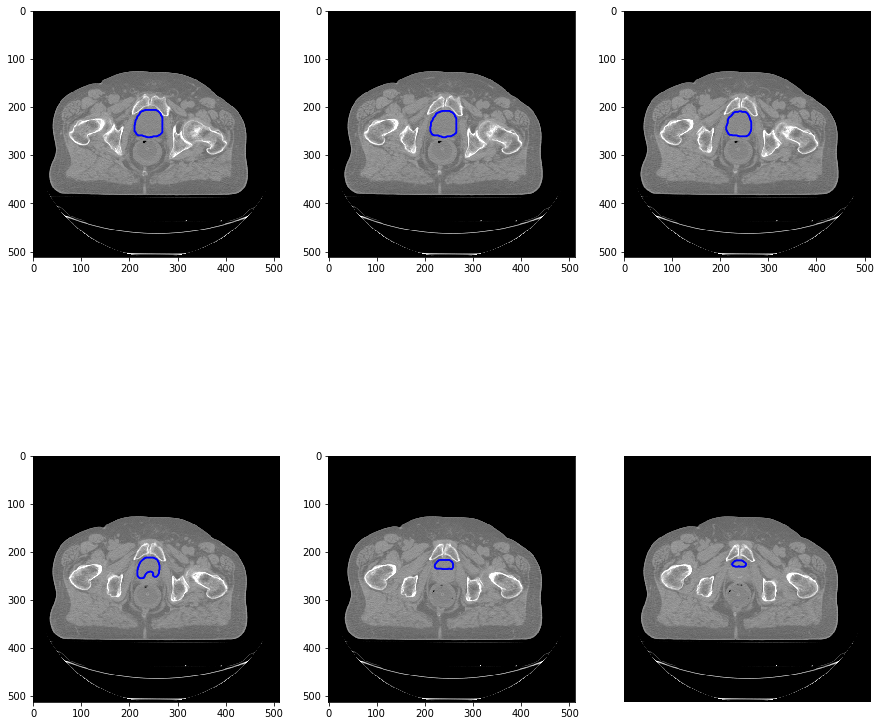

In [26]:
#bladder
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i + 14 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label1[..., i + 14 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [30]:
# Parameters
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 5
SD=[c*1.7, c*2, c*2.5]
w = 6
k = 45
circles = 3

In [ ]:
assd_contour = []

for i in range(6):
    dx, dy, mask, t, L  = af.assd(image[..., i + 14], label1[..., i + 14], voxelsize, a, SD, circles=3, seed=123, k=k, w=w, smooth=True, blur=True, ismax=True)
    du = af.plotting_assd(dx, dy, mask, image[..., i + 14], quiver=False, plot=False)
    du_2 = np.where(du < 0.5, 0, 4)
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)

## Contour Plot
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i  + 14 ], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[..., i], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label1[..., i + 14 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

(190.0, 300.0, 300.0, 190.0)

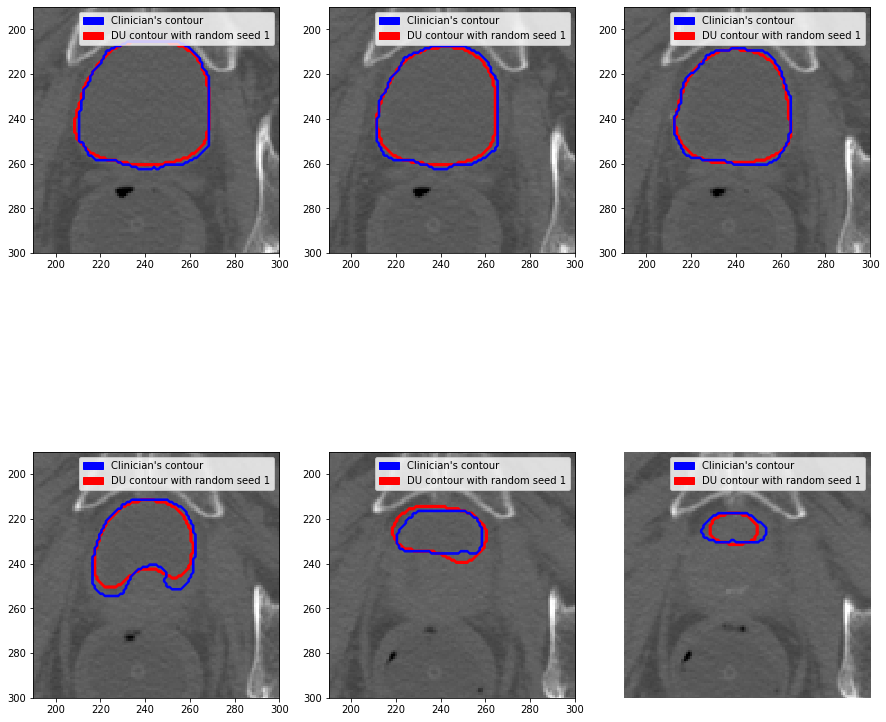

In [34]:
import matplotlib.patches as mpatches

## Contour Plot
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i  + 14 ], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[..., i], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label1[..., i + 14 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

## Rectum

(-0.5, 511.5, 511.5, -0.5)

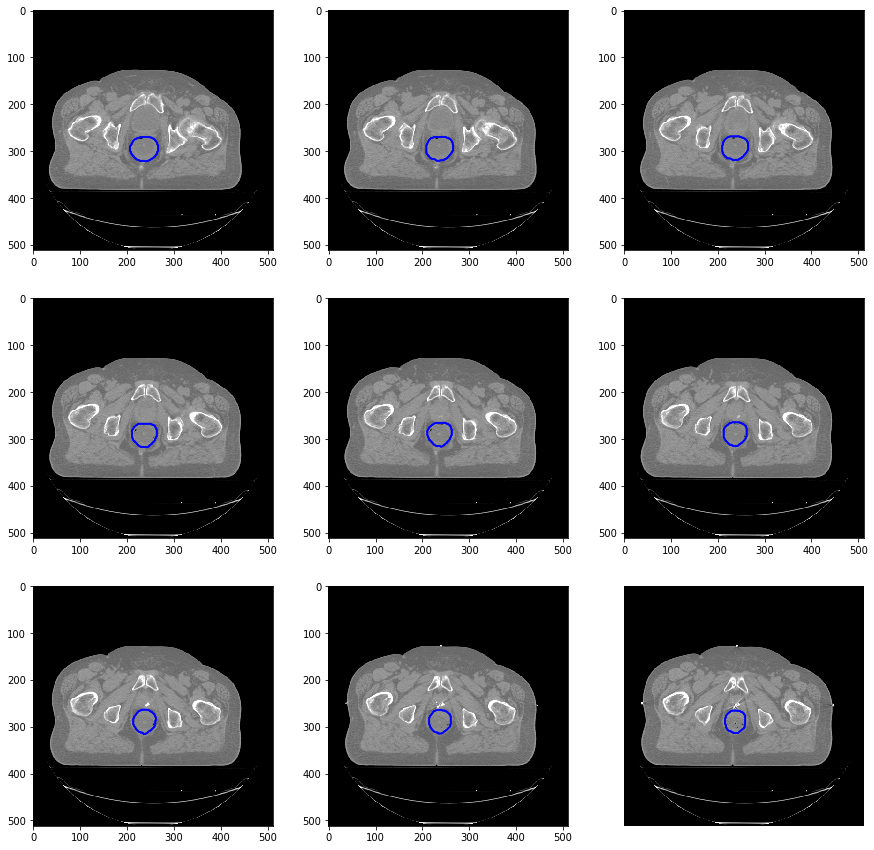

In [15]:
#rectum
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label2[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
assd_contour = []

for i in range(6):
    dx, dy, mask, t, L  = af.assd(image[..., i + 15], label2[..., i + 15], voxelsize, a, SD, circles=3, seed=123, k=k, w=w, smooth=True, blur=True, ismax=True)
    du = af.plotting_assd(dx, dy, mask, image[..., i + 15], quiver=False, plot=False)
    du_2 = np.where(du < 0.5, 0, 4)
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)

(190.0, 325.0, 325.0, 190.0)

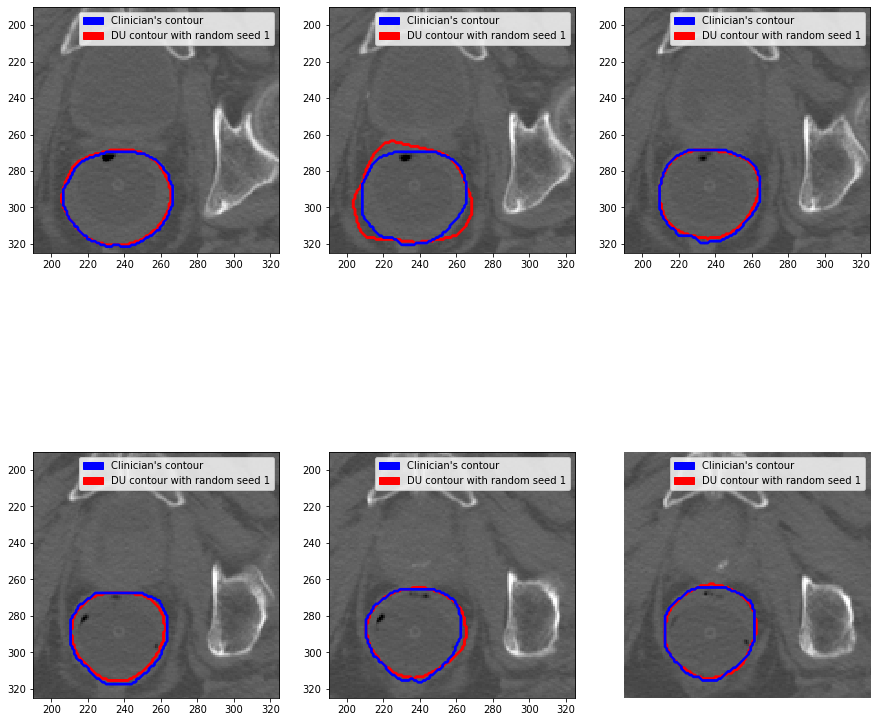

In [47]:
## Contour Plot
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i  + 15], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[..., i], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label2[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 325)
    plt.ylim(325, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

## Prostate

C:\Users\lykha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


(-0.5, 511.5, 511.5, -0.5)

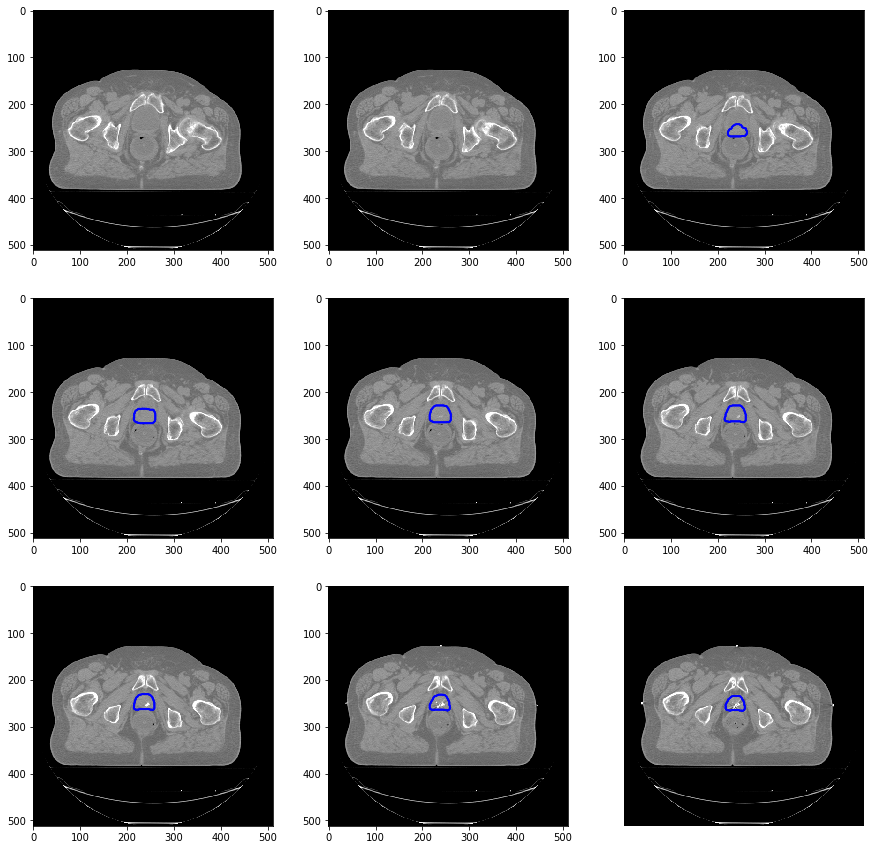

In [16]:
#prostate
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i + 17 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label3[..., i + 17 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

(190.0, 300.0, 300.0, 190.0)

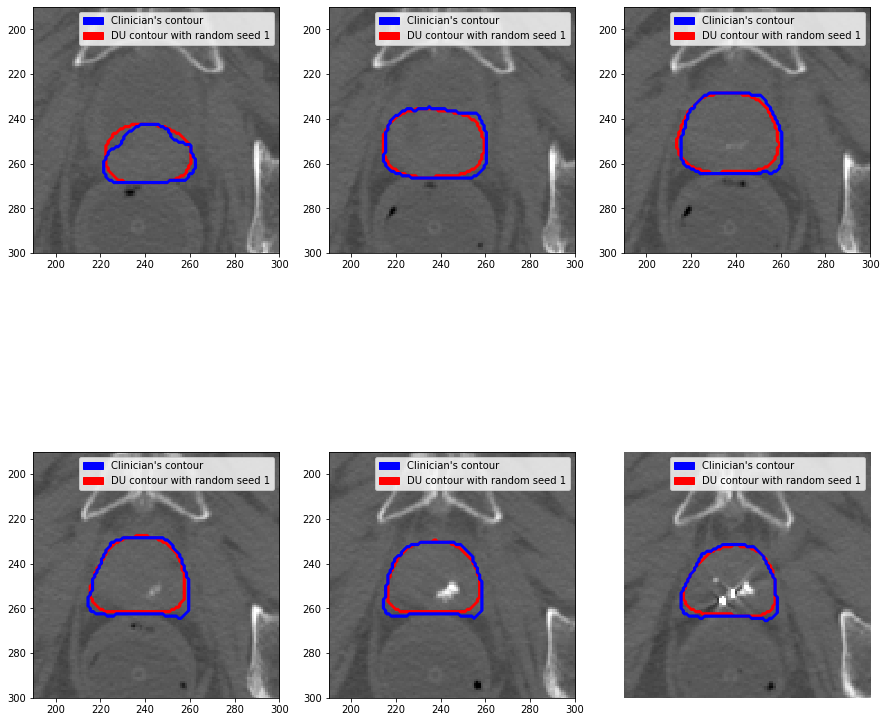

In [48]:
assd_contour = []

for i in range(6):
    dx, dy, mask, t, L  = af.assd(image[..., i + 17], label3[..., i + 17], voxelsize, a, SD, circles=3, seed=123, k=k, w=w, smooth=True, blur=True, ismax=True)
    du = af.plotting_assd(dx, dy, mask, image[..., i + 17], quiver=False, plot=False)
    du_2 = np.where(du < 0.5, 0, 4)
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)

## Contour Plot
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i  + 17], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[..., i], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label3[..., i + 17], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

## Seminal vesicles

(-0.5, 511.5, 511.5, -0.5)

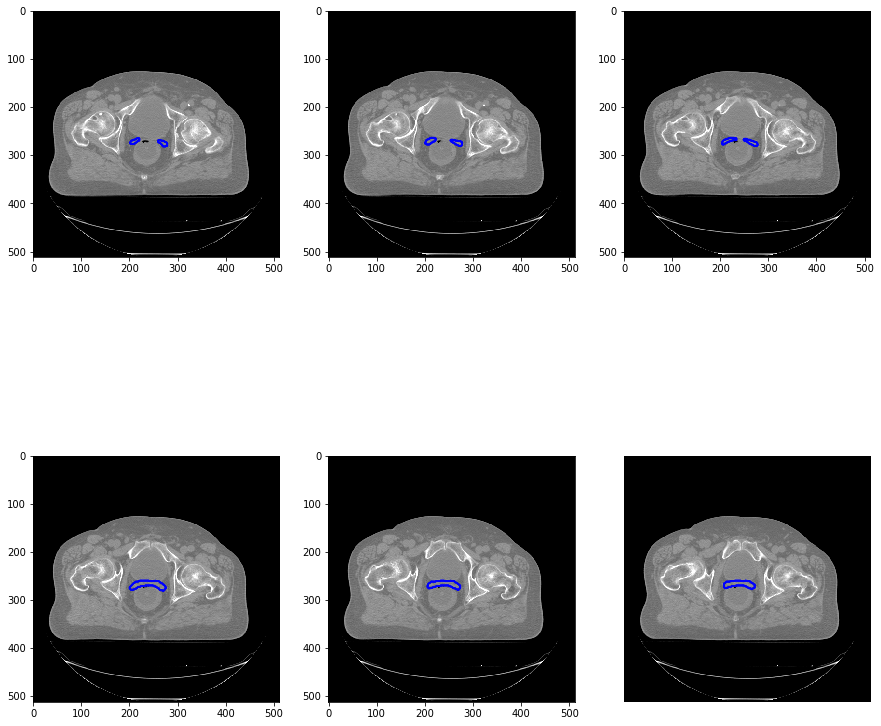

In [52]:
#Seminal vesicles
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i + 7 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label4[..., i + 7 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
assd_contour = []

for i in range(6):
    dx, dy, mask, t, L  = af.assd(image[..., i + 7], label4[..., i + 7], voxelsize, a, SD, circles=3, seed=123, k=k, w=w, smooth=True, blur=True, ismax=True)
    du = af.plotting_assd(dx, dy, mask, image[..., i + 7], quiver=False, plot=False)
    du_2 = np.where(du < 0.5, 0, 4)
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)

## Contour Plot
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i  + 7], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[..., i], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label4[..., i + 7], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')

## Femoral head

(-0.5, 511.5, 511.5, -0.5)

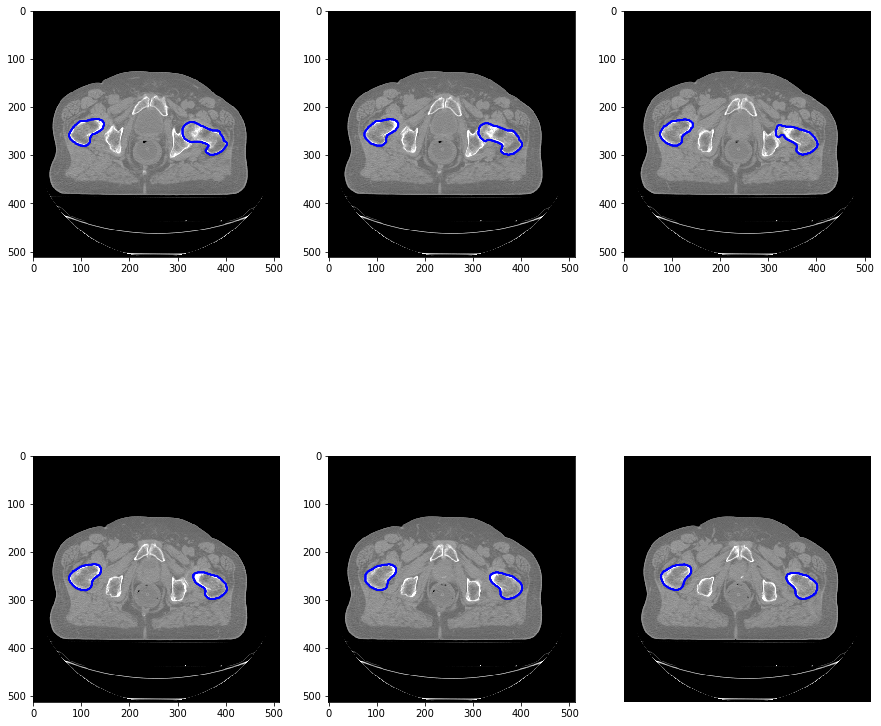

In [57]:
#femoral head
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label5[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [ ]:
assd_contour = []

for i in range(6):
    dx, dy, mask, t, L  = af.assd(image[..., i + 15], label5[..., i + 15], voxelsize, a, SD, circles=3, seed=123, k=k, w=w, smooth=True, blur=True, ismax=True)
    du = af.plotting_assd(dx, dy, mask, image[..., i + 15], quiver=False, plot=False)
    du_2 = np.where(du < 0.5, 0, 4)
    assd_contour.append(list(du_2)) #surface
assd_contour = np.array(assd_contour).transpose(1, 2, 0)

## Contour Plot
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image[..., i  + 15], cmap="gray", vmin=500, vmax=2000)
    plt.contour(assd_contour[..., i], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(label5[..., i + 15], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(190, 300)
    plt.ylim(300, 190)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[ blue_patch, red_patch])
    
plt.axis('off')